In [1]:
from src.fibonacci_optimizer import FibonacciOptimizer
from src.fibonacci_helper import FibonacciHelper
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nside = 8192
patch_size = 10
save_dir = '/lustre/work/akira.tokiwa/Projects/LensingSSC/plot/setting/'
radius = np.radians(patch_size) * np.sqrt(2)

In [ ]:
N=273
points = FibonacciHelper.fibonacci_grid_on_sphere(N)

In [96]:
import healpy as hp
samplemap = hp.read_map('/lustre/work/akira.tokiwa/Projects/LensingSSC/data/fullsky/bigbox/zs1.5/kappa_zs1.5_s104.fits')


In [97]:
samplemap2 = hp.read_map("/lustre/work/akira.tokiwa/Projects/LensingSSC/data/fullsky/tiled/zs1.5/kappa_zs1.5_s209.fits")

/home/akira.tokiwa/.conda/envs/lssc/lib/python3.8/site-packages/healpy/visufunc.py:1503: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  ax.graticule(dpar=dpar, dmer=dmer, coord=coord, local=local, **kwds)


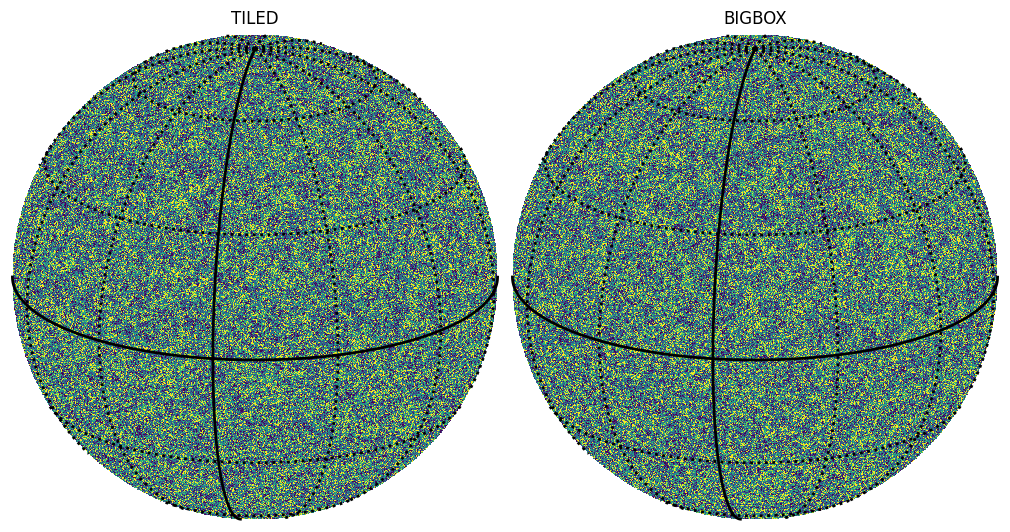

In [98]:
fig = plt.figure(figsize=(10, 5))
hp.orthview(samplemap2, half_sky=True, title='TILED', rot=(-10,20,0), min=-0.032, max=0.032, nest=True, cmap="viridis", cbar=False, notext=True, sub=(1,2,1), fig=fig)
hp.orthview(samplemap, half_sky=True, title='BIGBOX', rot=(-10,20,0), min=-0.032, max=0.032, nest=True, cmap="viridis", cbar=False, notext=True, sub=(1,2,2), fig=fig)

#add graticule
hp.graticule(dpar=30, dmer=30, verbose=False, lw=2)

In [142]:
xsize = 2048
padding = 0.1 + np.sqrt(2)
patch_size_deg = 5
resolution_arcmin = (patch_size_deg * 60.0) / xsize

samplepatch = hp.gnomview(
                samplemap,
                rot=[0, 0],
                xsize=xsize * padding,
                reso=resolution_arcmin,
                return_projected_map=True,
                nest=True,
                no_plot=True,
            )

In [143]:
samplepatch2 = hp.gnomview(
                samplemap2,
                rot=[0, 0],
                xsize=xsize * padding,
                reso=resolution_arcmin,
                return_projected_map=True,
                nest=True,
                no_plot=True,
            )

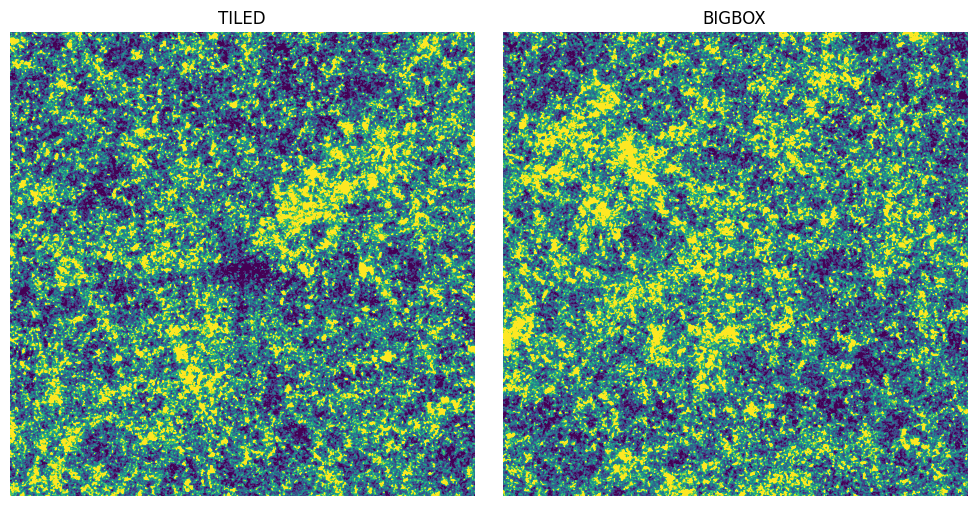

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].imshow(samplepatch, cmap="viridis", vmin = -0.032, vmax = 0.032)
ax[1].set_title("BIGBOX")

ax[0].imshow(samplepatch2, cmap="viridis", vmin = -0.032, vmax = 0.032)
ax[0].set_title("TILED")

for i in range(2):
    ax[i].axis("off")

plt.tight_layout()
plt.show()

In [103]:
# Rotate the image by 45 degrees without changing the shape
from scipy.ndimage import rotate

image = samplepatch
side_length = 2048


rotated_image = rotate(image, 45, reshape=False)

center_y, center_x = np.array(rotated_image.shape) // 2
half_side = side_length // 2

y_start = max(center_y - half_side, 0)
y_end = y_start + side_length
x_start = max(center_x - half_side, 0)
x_end = x_start + side_length

# Ensure the patch does not exceed image boundaries
y_end = min(y_end, rotated_image.shape[0])
x_end = min(x_end, rotated_image.shape[1])

patch = rotated_image[y_start:y_end, x_start:x_end]

rotated_image[rotated_image == 0] = np.nan

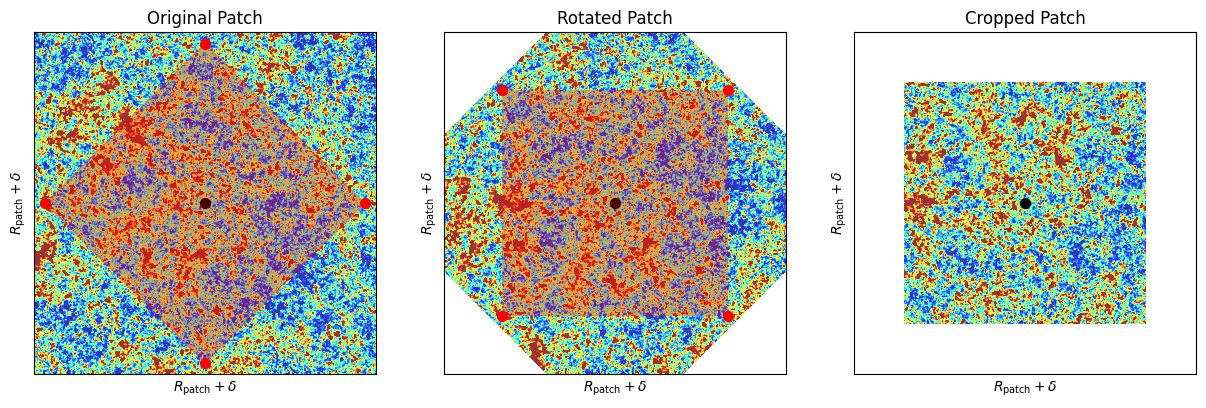

In [106]:
cmap = plt.cm.jet

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(samplepatch, cmap=cmap, vmin=-0.032, vmax=0.032, alpha=0.8)
ax[0].scatter(samplepatch.shape[0]/2, samplepatch.shape[1]/2, c='k', s=50)
ax[0].scatter(samplepatch.shape[0]/2 + side_length/np.sqrt(2), samplepatch.shape[1]/2, c='r', s=50)
ax[0].scatter(samplepatch.shape[0]/2 - side_length/np.sqrt(2), samplepatch.shape[1]/2, c='r', s=50)
ax[0].scatter(samplepatch.shape[0]/2, samplepatch.shape[1]/2 + side_length/np.sqrt(2), c='r', s=50)
ax[0].scatter(samplepatch.shape[0]/2, samplepatch.shape[1]/2 - side_length/np.sqrt(2), c='r', s=50)
polygon = plt.Polygon([
    (samplepatch.shape[0]/2 + side_length/np.sqrt(2), samplepatch.shape[1]/2),
    (samplepatch.shape[0]/2, samplepatch.shape[1]/2 + side_length/np.sqrt(2)),
    (samplepatch.shape[0]/2 - side_length/np.sqrt(2), samplepatch.shape[1]/2),
    (samplepatch.shape[0]/2, samplepatch.shape[1]/2 - side_length/np.sqrt(2))
], color='r', alpha=0.3)
ax[0].add_patch(polygon)
ax[0].set_title('Original Patch')

ax[1].imshow(rotated_image, cmap=cmap, vmin=-0.032, vmax=0.032, alpha=0.8)
ax[1].scatter(center_x, center_y, c='k', s=50)
ax[1].scatter(x_start, y_start, c='r', s=50)
ax[1].scatter(x_end, y_end, c='r', s=50)
ax[1].scatter(x_start, y_end, c='r', s=50)
ax[1].scatter(x_end, y_start, c='r', s=50)
ax[1].fill([x_start, x_end, x_end, x_start], [y_start, y_start, y_end, y_end], 'r', alpha=0.3)
ax[1].set_title('Rotated Patch')


ax[2].imshow(patch, cmap=cmap, vmin=-0.032, vmax=0.032, alpha=0.8)
ax[2].scatter(patch.shape[0]/2, patch.shape[1]/2, c='k', s=50)

ax[2].set_ylim(patch.shape[0]/2 - side_length/np.sqrt(2), patch.shape[0]/2 + side_length/np.sqrt(2))
ax[2].set_xlim(patch.shape[1]/2 - side_length/np.sqrt(2), patch.shape[1]/2 + side_length/np.sqrt(2))
ax[2].set_title('Cropped Patch')

for axi in ax:
    axi.set_ylabel(r'$R_{\mathrm{patch}} + \delta\,$')
    axi.set_xlabel(r'$R_{\mathrm{patch}} + \delta\,$')
    axi.set_xticks([])
    axi.set_yticks([])

plt.show()

In [5]:
mask_northpole = points[:, 0] <= radius
mask_southpole = points[:, 0] >= np.pi - radius
mask_equator0 = np.sqrt((points[:, 0] - np.pi/2)**2 + points[:, 1]**2) <= radius/2
mask_equator1 = np.sqrt((points[:, 0] - np.pi/2)**2 + (points[:, 1]-np.pi/2)**2) <= radius/2
mask_equator2 = np.sqrt((points[:, 0] - np.pi/2)**2 + (points[:, 1]-np.pi)**2) <= radius/2
mask_equator3 = np.sqrt((points[:, 0] - np.pi/2)**2 + (points[:, 1]-3*np.pi/2)**2) <= radius/2
mask = mask_northpole | mask_southpole | mask_equator0 | mask_equator1 | mask_equator2 | mask_equator3

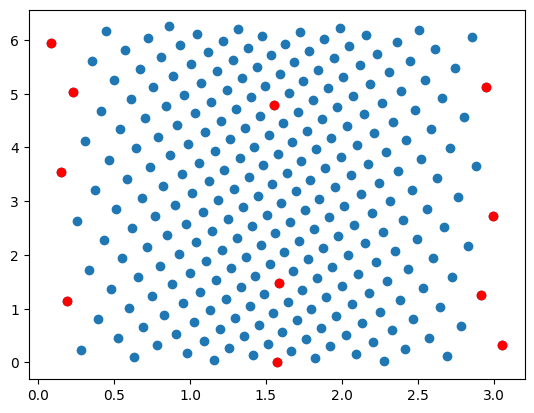

In [6]:
plt.scatter(points[:,0], points[:,1])
plt.scatter(points[mask,0], points[mask,1], c='r')


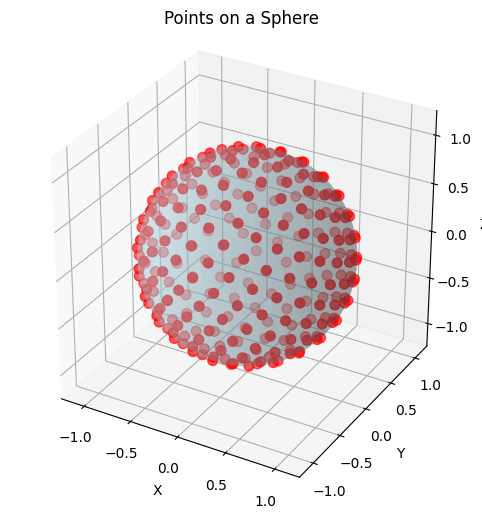

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example spherical coordinates (theta, phi) in radians
spherical_coords = points

# Separate theta and phi
theta, phi = zip(*spherical_coords)
theta = np.array(theta)
phi = np.array(phi)

# Radius of the sphere
r = 1

# Convert to Cartesian coordinates
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a mesh for the sphere surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
sphere_x = r * np.outer(np.cos(u), np.sin(v))
sphere_y = r * np.outer(np.sin(u), np.sin(v))
sphere_z = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the sphere surface
ax.plot_surface(sphere_x, sphere_y, sphere_z, color='lightblue', alpha=0.3, edgecolor='none')

# Plot the points
ax.scatter(x, y, z, color='red', s=50)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set aspect ratio to be equal
ax.set_box_aspect([1,1,1])

# Optional: Set limits
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])

# Show the plot
plt.title('Points on a Sphere')
plt.show()

In [5]:
optimizer = FibonacciOptimizer(nside, patch_size, Ninit=20, Nstepinit=10)
#N = optimizer.optimize(verbose=True)
optimizer.N_opt=273

In [6]:
# prev points
points = FibonacciHelper.fibonacci_grid_on_sphere(optimizer.N_opt)
valid_points = points[(points[:, 0] < np.pi - optimizer.radius) & (points[:, 0] > optimizer.radius)]

# additinal mask
mask_equator0 = np.sqrt((valid_points[:, 0] - np.pi/2)**2 + valid_points[:, 1]**2) <= optimizer.radius/2
mask_equator1 = np.sqrt((valid_points[:, 0] - np.pi/2)**2 + (valid_points[:, 1]-np.pi/2)**2) <= optimizer.radius/2
mask_equator2 = np.sqrt((valid_points[:, 0] - np.pi/2)**2 + (valid_points[:, 1]-np.pi)**2) <= optimizer.radius/2
mask_equator3 = np.sqrt((valid_points[:, 0] - np.pi/2)**2 + (valid_points[:, 1]-3*np.pi/2)**2) <= optimizer.radius/2

In [7]:
print(np.where(mask_equator0))
print(np.where(mask_equator1))
print(np.where(mask_equator2))
print(np.where(mask_equator3))

(array([132]),)
(array([134]),)
(array([], dtype=int64),)
(array([130]),)


In [145]:
import healpy as hp

tmp = np.zeros(hp.nside2npix(optimizer.nside))

points = FibonacciHelper.fibonacci_grid_on_sphere(optimizer.N_opt)

mask_northpole = points[:, 0] <= optimizer.radius 
mask_southpole = points[:, 0] >= np.pi - optimizer.radius




#mask = mask_northpole | mask_southpole | mask_equator | mask_longitude1 | mask_longitude2 | mask_longitude3 | mask_longitude4

"""mask_equator0 = np.sqrt((points[:, 0] - np.pi/2)**2 + points[:, 1]**2) <= optimizer.radius/2
mask_equator1 = np.sqrt((points[:, 0] - np.pi/2)**2 + (points[:, 1]-np.pi/2)**2) <= optimizer.radius/2
mask_equator2 = np.sqrt((points[:, 0] - np.pi/2)**2 + (points[:, 1]-np.pi)**2) <= optimizer.radius/2
mask_equator3 = np.sqrt((points[:, 0] - np.pi/2)**2 + (points[:, 1]-3*np.pi/2)**2) <= optimizer.radius/2"""


mask = mask_northpole | mask_southpole #| mask_equator0 | mask_equator1 | mask_equator2 | mask_equator3
invalid_points = points[mask]
valid_points = points[~mask]

# Calculate patch pixel counts for valid and invalid points
pixels = []
for center in valid_points:
    vertices = optimizer.rotated_vertices(center)
    vecs = hp.ang2vec(vertices[:, 0], vertices[:, 1])
    ipix = hp.query_polygon(nside=optimizer.nside, vertices=vecs, nest=True)
    tmp[ipix] += 1
    pixels.append(len(ipix))

for center in invalid_points:
    vertices = optimizer.rotated_vertices(center)
    vecs = hp.ang2vec(vertices[:, 0], vertices[:, 1])
    ipix = hp.query_polygon(nside=optimizer.nside, vertices=vecs, nest=True)
    tmp[ipix] -= 1
    pixels.append(len(ipix))

In [146]:
# count pixels has 1
area_covered = np.sum(tmp==1)

# count pixels has 0 or -1
area_not_covered = np.sum(tmp==0) + np.sum(tmp==-1)

percent_covered = area_covered / (area_covered + area_not_covered)

In [147]:
print(f'Percent covered: {percent_covered:.2f}')

Percent covered: 0.64


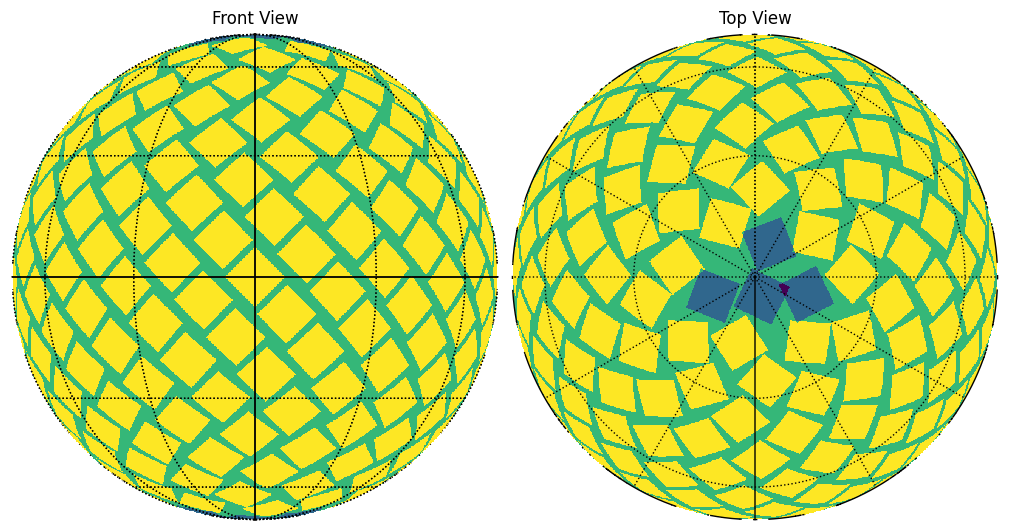

In [148]:
fig = plt.figure(figsize=(10, 5))

hp.orthview(tmp, nest=True, half_sky=True, title='Front View', sub=(1, 2, 1,), cbar=False)
hp.graticule()

hp.orthview(tmp, nest=True, half_sky=True, title='Top View', sub=(1, 2, 2), rot=(0, 90, 0), cbar=False)
hp.graticule()


In [157]:

tmp2 = np.zeros(hp.nside2npix(optimizer.nside))

points = FibonacciHelper.fibonacci_grid_on_sphere(optimizer.N_opt)

equator_threshold = optimizer.radius / 2
longitude_threshold = optimizer.radius / 2 

black_list = [132]

mask_equator = np.abs(points[:, 0] - np.pi/2) <= equator_threshold
mask_longitude1 = np.abs(points[:, 1]) <= longitude_threshold 
mask_longitude2 = np.abs(points[:, 1] - np.pi /2) <= longitude_threshold 
mask_longitude3 = np.abs(points[:, 1] - np.pi) <= longitude_threshold 
mask_longitude4 = np.abs(points[:, 1] - 3*np.pi/2) <= longitude_threshold 
mask_longitude5 = np.abs(points[:, 1] - 2*np.pi) <= longitude_threshold

mask = mask_northpole | mask_southpole | mask_equator | mask_longitude1 | mask_longitude2 | mask_longitude3 | mask_longitude4 | mask_longitude5
invalid_points = points[mask]
valid_points = points[~mask]

# Calculate patch pixel counts for valid and invalid points
pixels = []
for center in valid_points:
    vertices = optimizer.rotated_vertices(center)
    vecs = hp.ang2vec(vertices[:, 0], vertices[:, 1])
    ipix = hp.query_polygon(nside=optimizer.nside, vertices=vecs, nest=True)
    tmp2[ipix] += 1
    pixels.append(len(ipix))

for center in invalid_points:
    vertices = optimizer.rotated_vertices(center)
    vecs = hp.ang2vec(vertices[:, 0], vertices[:, 1])
    ipix = hp.query_polygon(nside=optimizer.nside, vertices=vecs, nest=True)
    tmp2[ipix] -= 1
    pixels.append(len(ipix))

In [158]:
# count pixels has 1
area_covered = np.sum(tmp2==1)

# count pixels has 0 or -1
area_not_covered = np.sum(tmp2==0) + np.sum(tmp2==-1)

percent_covered = area_covered / (area_covered + area_not_covered)

In [159]:
print(f'Percent covered: {percent_covered:.2f}')

Percent covered: 0.47


In [153]:
valid_points.shape

(194, 2)

In [154]:
invalid_points.shape

(79, 2)

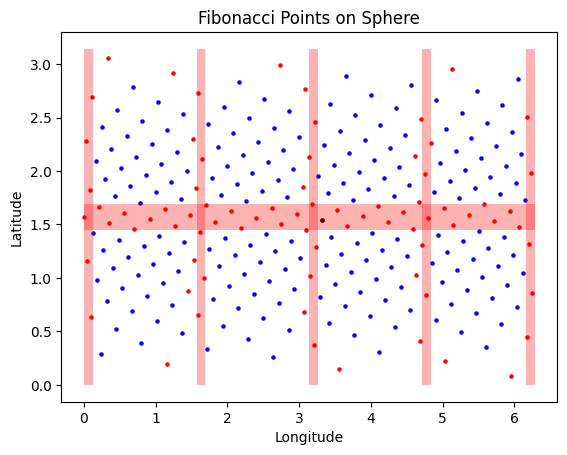

In [155]:
plt.scatter(invalid_points[:, 1], invalid_points[:, 0], c='r', s=5)
plt.scatter(valid_points[:, 1], valid_points[:, 0], c='b', s=5)
plt.scatter(points[black_list, 1], points[black_list, 0], c='k', s=5)

# shade the area
plt.fill([0, 2 * np.pi, 2 * np.pi, 0], [np.pi/2 - equator_threshold, np.pi/2 - equator_threshold, np.pi/2 + equator_threshold, np.pi/2 + equator_threshold], 'r', alpha=0.3)
plt.fill([0, longitude_threshold, longitude_threshold, 0], [0, 0, np.pi, np.pi], 'r', alpha=0.3)
plt.fill([np.pi/2, np.pi/2 + longitude_threshold, np.pi/2 + longitude_threshold, np.pi/2], [0, 0, np.pi, np.pi], 'r', alpha=0.3)
plt.fill([np.pi, np.pi + longitude_threshold, np.pi + longitude_threshold, np.pi], [0, 0, np.pi, np.pi], 'r', alpha=0.3)
plt.fill([3*np.pi/2, 3*np.pi/2 + longitude_threshold, 3*np.pi/2 + longitude_threshold, 3*np.pi/2], [0, 0, np.pi, np.pi], 'r', alpha=0.3)
plt.fill([2*np.pi, 2*np.pi - longitude_threshold, 2*np.pi - longitude_threshold, 2*np.pi], [0, 0, np.pi, np.pi], 'r', alpha=0.3)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fibonacci Points on Sphere')
plt.show()

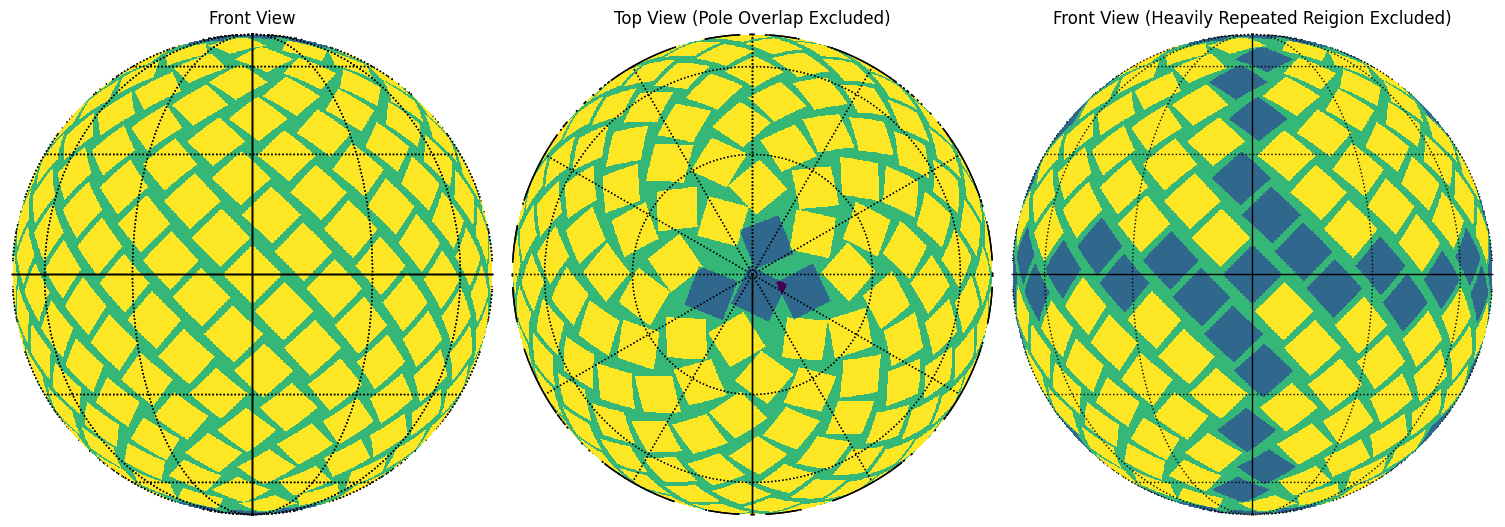

In [166]:
fig = plt.figure(figsize=(15, 5))

# Front View
hp.orthview(tmp, nest=True, half_sky=True, title='Front View', sub=(1, 3, 1), cbar=False)
hp.graticule()

# Top View (Excluding overlapped patch near poles)
hp.orthview(tmp, nest=True, half_sky=True, title='Top View (Pole Overlap Excluded)', sub=(1, 3, 2), rot=(0, 90, 0), cbar=False)
hp.graticule()

# Front View (Excluding heavily tiled patch)
hp.orthview(tmp2, nest=True, half_sky=True, title='Front View (Heavily Repeated Reigion Excluded)', sub=(1, 3, 3), cbar=False)
hp.graticule()

plt.show()


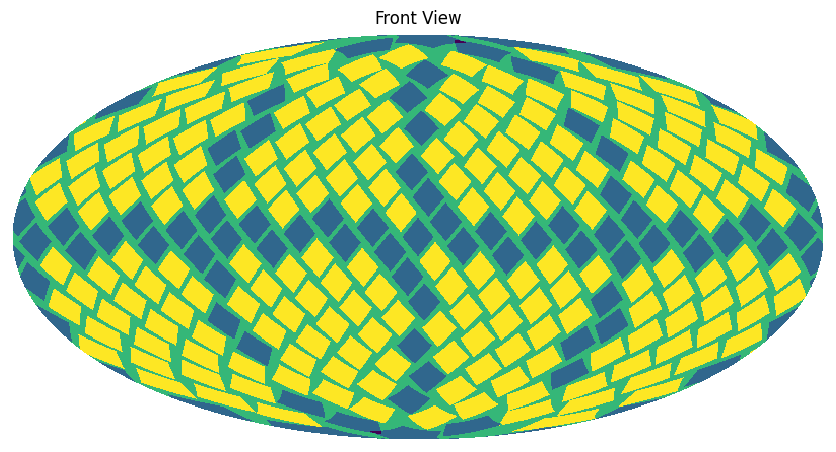

In [167]:
hp.mollview(tmp2, nest=True, title='Front View', cbar=False)

In [45]:
fibonacci_grid_filename = f'{save_dir}/fibonacci_grid.png'
fig.savefig(fibonacci_grid_filename, bbox_inches='tight')
print(f'Fibonacci grid saved at {fibonacci_grid_filename}')
plt.close(fig)

Fibonacci grid saved at /lustre/work/akira.tokiwa/Projects/LensingSSC/plot/setting//fibonacci_grid.png
